<a href="https://colab.research.google.com/github/PreyeaRegmi/GT/blob/main/TSC_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

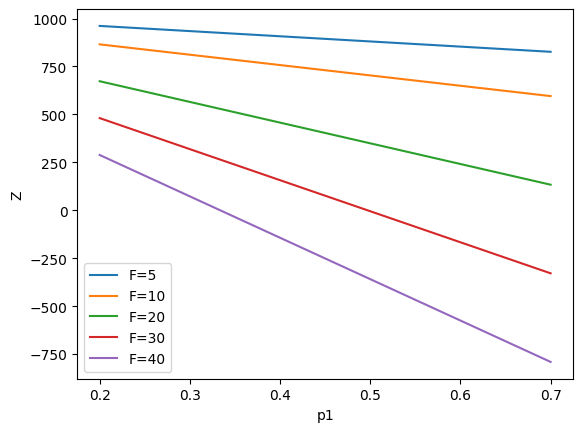

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fig. 4. The impact of p1 and F on the attacker’s benefit.

np.random.seed(42)  # Set seed for reproducibility

u = 2000
Cd = 1
T = 2
F_values = [5, 10, 20, 30, 40]
p0 = 0.2
X = np.arange(0.2, 0.71, 0.1)
V = 100 * np.random.rand(100)
R = 110 * np.random.rand(100)
A = 0.6 * np.random.rand(100)

fig, ax = plt.subplots()

for F in F_values:
    sum1 = np.zeros(100)
    Y = np.zeros_like(X)

    for ii in range(len(X)):
        for i in range(100):
            if V[i] >= R[i]:
                sum1[i] = (1 - np.exp(-1 * u * A[i] / V[i])) * (-1 * F * p0 + (1 - p0) * R[i]) - A[i]
            elif V[i] < R[i]:
                sum1[i] = (1 - np.exp(-1 * u * A[i] / V[i])) * (-1 * F * X[ii]) - A[i]
        Y[ii] = np.sum(sum1) - Cd

    ax.plot(X, Y, label=f'F={F}')

ax.set_xlabel('p1')
ax.set_ylabel('Z')
ax.legend()
plt.show()


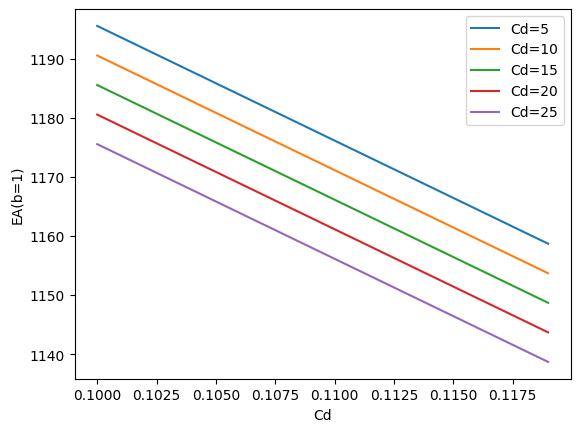

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Fig. 5. The impact of p0 and CD on the attacker’s benefit.

np.random.seed(42)  # Set seed for reproducibility

u = 20000
Cd_values = [5, 10, 15, 20, 25]
p0 = 0.1
p1 = 0.6
F = 6

X = np.arange(0.1, 0.12,0.001)
V = 100 * np.random.rand(100)
R = 60 * np.random.rand(100)
A = 0.6 * np.random.rand(100)

sum1 = np.zeros(100)
Y = np.zeros_like(X)

fig, ax = plt.subplots()

for Cd in Cd_values:
    for ii in range(len(X)):
        for i in range(100):
            if V[i] >= R[i]:
                sum1[i] = (1 - np.exp(-1 * u * A[i] / V[i])) * (-1 * F * X[ii] + (1 - X[ii]) * R[i]) - A[i]
            elif V[i] < R[i]:
                sum1[i] = (1 - np.exp(-1 * u * A[i] / V[i])) * (-1 * F * p1) - A[i]

        Y[ii] = np.sum(sum1) - Cd

    ax.plot(X, Y, label=f'Cd={Cd}')

ax.set_xlabel('Cd')
ax.set_ylabel('EA(b=1)')
ax.legend()
plt.show()


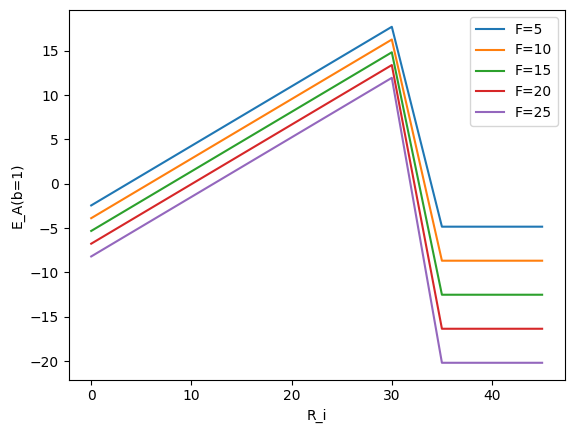

In [36]:
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt

# Fig. 6. The impact of R and F on the attacker’s benefit.

np.random.seed(42)  # Set seed for reproducibility

u = 20000
Cd = 1
T = 2
p0 = 0.3
p1 = 0.8

V = 31.1  # Scalar value
A = 0.005  # Scalar value

Fi = defaultdict(list)
Ei = defaultdict(list)

# Define realistic ranges for the variables
F_range = [5, 10, 15, 20, 25]  # Updated range for B
R_range = range(0,50,5) # Updated range for B

for F in F_range:
    for R in R_range:
        sum1 = 0
        if V >= R:
            sum1 = (1 - np.exp(-1 * u * A / V)) * (-1 * F * p0 + (1 - p0) * R) - A
        elif V < R:
            sum1 = (1 - np.exp(-1 * u * A / V)) * (-1 * F * p1) - A

        Fi[F].append(R)
        Ei[F].append(np.sum(sum1) - Cd)

# Plotting
fig, ax = plt.subplots()

for F, values in Ei.items():
    ax.plot(Fi[F], values, label=f'F={F}')

ax.set_xlabel('R_i')
ax.set_ylabel('E_A(b=1)')
ax.legend()
plt.show()


<ipython-input-13-3f41d75cf3ac>:28: RuntimeWarning: divide by zero encountered in double_scalars
  sum1[i] = (1 - np.exp(-1 * u * A[i] / X[ii])) * (-1 * F * p0 + (1 - p0) * R[i]) - A[i]
<ipython-input-13-3f41d75cf3ac>:30: RuntimeWarning: divide by zero encountered in double_scalars
  sum1[i] = (1 - np.exp(-1 * u * A[i] / X[ii])) * (-1 * F * (1 - p0)) - A[i]


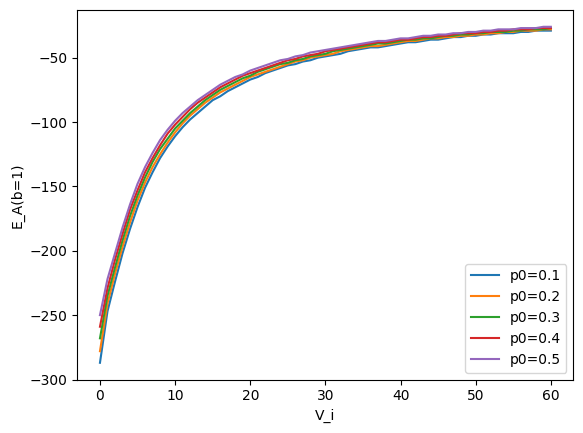

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Fig. 8. The impact of V and p0 on the attacker’s benefit.

np.random.seed(42)  # Set seed for reproducibility

u = 100
Cd = 1
T = 2
F = 6
p1 = 0.7

X = np.arange(0, 61, 1)
V = 10 * np.random.rand(100)
R = 15 * np.random.rand(100)
A = 0.1 * np.random.rand(100)
sum1 = np.zeros(100)
N = len(X)

fig, ax = plt.subplots()

p0_values = [0.1, 0.2, 0.3, 0.4, 0.5]

for p0 in p0_values:
    Y = np.zeros_like(X)
    for ii in range(N):
        for i in range(100):
            if V[i] >= R[i]:
                sum1[i] = (1 - np.exp(-1 * u * A[i] / X[ii])) * (-1 * F * p0 + (1 - p0) * R[i]) - A[i]
            elif V[i] < R[i]:
                sum1[i] = (1 - np.exp(-1 * u * A[i] / X[ii])) * (-1 * F * (1 - p0)) - A[i]

        Y[ii] = np.sum(sum1) - Cd

    ax.plot(X, Y, label=f'p0={p0}')

ax.set_xlabel('V_i')
ax.set_ylabel('E_A(b=1)')
ax.legend()
plt.show()


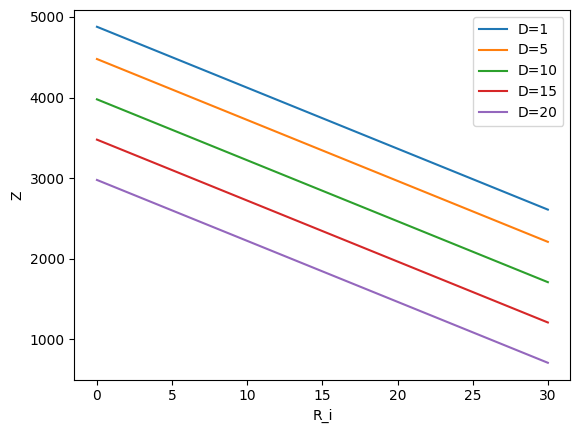

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fig. 10. The impact of Ri and D on the ith target’s benefit.

np.random.seed(42)  # Set seed for reproducibility

u = 20000
Cd = 1
T = 2
F = 6
D_values = [1, 5, 10, 15, 20]
p0 = 0.3
p1 = 0.4

X = np.arange(0, 31, 5)

R = 60 * np.random.rand(100)
V = 100 * np.random.rand(100)
A = 0.01 * np.random.rand(100)

sum1 = np.zeros(100)
Y = np.zeros_like(X)

fig, ax = plt.subplots()

for D in D_values:
    for ii in range(len(X)):
        for i in range(100):
            sum1[i] = V[i] - D - (1 - np.exp(-1 * u * A[i] / V[i])) * X[ii]

        Y[ii] = np.sum(sum1)

    ax.plot(X, Y, label=f'D={D}')

ax.set_xlabel('R_i')
ax.set_ylabel('Z')
ax.legend()
plt.show()


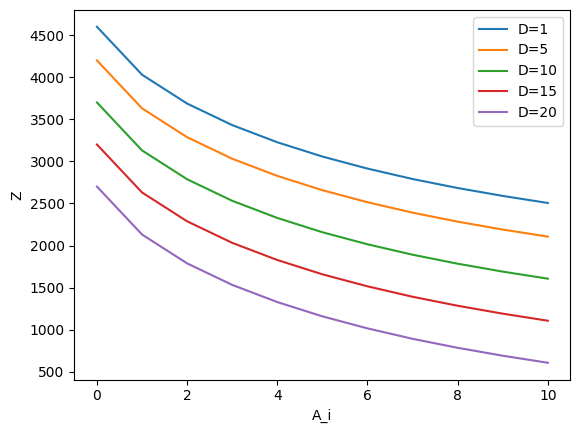

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # Set seed for reproducibility

u = 5
Cd = 1
T = 2
F = 6
D_values = [1, 5, 10, 15, 20]
p0 = 0.3
p1 = 0.4

X = np.arange(0, 11, 1)

V = 100 * np.random.rand(100)
R = 60 * np.random.rand(100)
A = 0.01 * np.random.rand(100)

sum1 = np.zeros(100)
Y = np.zeros_like(X)

fig, ax = plt.subplots()

for D in D_values:
    for ii in range(len(X)):
        for i in range(100):
            sum1[i] = V[i] - D - (1 - np.exp(-1 * u * X[ii] / V[i])) * R[i]

        Y[ii] = np.sum(sum1)

    ax.plot(X, Y, label=f'D={D}')

ax.set_xlabel('A_i')
ax.set_ylabel('Z')
ax.legend()
plt.show()


<ipython-input-16-a389965db15c>:28: RuntimeWarning: divide by zero encountered in double_scalars
  sum1[i] = X[ii] - D - (1 - np.exp(-1 * u * A[i] / X[ii])) * R[i]


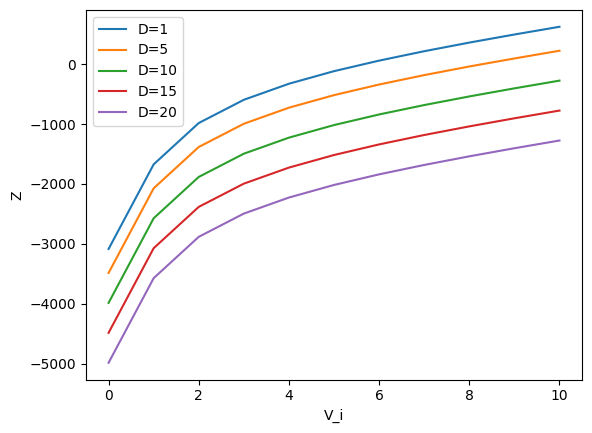

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fig. 12. The impact of Vi and D on the ith target’s benefit.

np.random.seed(42)  # Set seed for reproducibility

u = 200
Cd = 1
T = 2
F = 6
D_values = [1, 5, 10, 15, 20]
p0 = 0.3
p1 = 0.4

X = np.arange(0, 11, 1)

V = 100 * np.random.rand(100)
R = 60 * np.random.rand(100)
A = 0.01 * np.random.rand(100)

sum1 = np.zeros(100)
Y = np.zeros_like(X)

fig, ax = plt.subplots()

for D in D_values:
    for ii in range(len(X)):
        for i in range(100):
            sum1[i] = X[ii] - D - (1 - np.exp(-1 * u * A[i] / X[ii])) * R[i]

        Y[ii] = np.sum(sum1)

    ax.plot(X, Y, label=f'D={D}')

ax.set_xlabel('V_i')
ax.set_ylabel('Z')
ax.legend()
plt.show()
